In [6]:
#importing required libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#loading dataset
df=pd.read_csv("/content/fake_or_real_news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [8]:
#data cleaning using pandas
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [9]:
df.tail(5)

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [10]:
df.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [11]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [12]:
df.shape

(6335, 4)

In [13]:
df[df.index==566]

,Unnamed: 0,title,text,label
566,7103,Hillary Clinton BETRAYED by Her Own Family: “W...,Hillary Clinton’s niece has revealed to Radar ...,FAKE


In [14]:
df[df.index.isin(range(21,41))]

,Unnamed: 0,title,text,label
21,10348,Episode #160 – SUNDAY WIRE: ‘Hail to the Deplo...,"November 13, 2016 By 21wire Leave a Comment \n...",FAKE
22,778,Hillary Clinton Makes A Bipartisan Appeal on S...,Hillary Clinton told a Staten Island crowd tod...,REAL
23,3300,New Senate majority leader’s main goal for GOP...,Mitch McConnell has an unusual admonition for ...,REAL
24,6155,‘Inferno’ and the Overpopulation Myth,"Mises.org November 1, 2016 Inferno is a great ...",FAKE
25,636,Anti-Trump forces seek last-ditch delegate revolt,Washington (CNN) The faction of the GOP that i...,REAL
26,755,Sanders Trounces Clinton in W. Va. -- But Will...,"Meanwhile, Democrat Bernie Sanders picked up m...",REAL
27,626,Donald Trump Is Changing His Campaign Slogan t...,After a week of nonstop criticism from Democra...,REAL
28,691,Pure chaos: Donald Trump’s campaign management...,If you want a glimpse into a presidential cand...,REAL
29,5743,"Syrian War Report – November 1, 2016: Syrian M...","Syrian War Report – October 31, 2016: Al-Nusra...",FAKE
30,1787,GOP insiders: Carly crushed it,"On this day in 1973, J. Fred Buzhardt, a lawye...",REAL


In [15]:
df.size

25340

In [16]:
df.count()

Unnamed: 0    6335
title         6335
text          6335
label         6335
dtype: int64

In [17]:
df["text"].value_counts()

text
Killing Obama administration rules, dismantling Obamacare and pushing through tax reform are on the early to-do list.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [18]:
df.loc[500]

Unnamed: 0                                                 7253
title         Anonymous hacker Deric Lostutter faces 16 year...
text          Anonymous hacker Deric Lostutter faces 16 year...
label                                                      FAKE
Name: 500, dtype: object

In [19]:
df.iloc[2331:4213]

,Unnamed: 0,title,text,label
2331,7026,US Airstrike Killed Five Al-Qaeda Members in Y...,Get short URL 0 2 0 0 The US military killed f...,FAKE
2332,8664,The Only Way to Save the World is to Save Your...,The Only Way to Save the World is to Save Your...,FAKE
2333,7912,NO jail time for Muslim migrant who DUMPED BAB...,"This is now becoming the norm. Just yesterday,...",FAKE
2334,7578,Re: Schools All Over America Are Closing On El...,Schools All Over America Are Closing On Electi...,FAKE
2335,5657,Trump Mocks Biden's Dare To Take Him 'Behind t...,"\nIn the schoolyard of American politics, Rep...",FAKE
...,...,...,...,...
4208,8675,Hillaryous! Huckabee Compares Clintons to THES...,Hillaryous! Huckabee Compares Clintons to THES...,FAKE
4209,4635,Trump: Immigrants bring 'drugs ... crime' to U...,- Real estate mogul Donald Trump said during h...,REAL
4210,5929,Not Guilty: The Power of Nullification to Coun...,"By John Whitehead, the Rutherford Institute . ...",FAKE
4211,1699,"In rural America, a startling prospect: Voters...","Shelley Brannon, 62, can sum up the Obama pres...",REAL


In [20]:
df.drop(6000)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [22]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


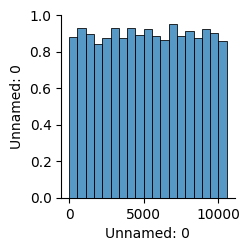

In [23]:
#data visualization using seaborn
sns.pairplot(df)

In [24]:
#preprocess text data
tokenizer=Tokenizer(num_words=10000,oov_token="<oov>")
tokenizer.fit_on_texts(df['text'])
sequences=tokenizer.texts_to_sequences(df['text'])
padded_sequences=pad_sequences(sequences,maxlen=100,padding='post')


In [25]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['label'], test_size=0.2, random_state=42)

In [26]:
y_train=y_train.map({'FAKE':0,'REAL':1})
y_test=y_test.map({'FAKE':0,'REAL':1})

In [27]:
#build and train NLP model using LSTM
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=100),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
159/159 [==============================] - 45s 258ms/step - loss: 0.5663 - accuracy: 0.6922 - val_loss: 0.4401 - val_accuracy: 0.8200
Epoch 2/100
159/159 [==============================] - 17s 106ms/step - loss: 0.2687 - accuracy: 0.8998 - val_loss: 0.3445 - val_accuracy: 0.8611
Epoch 3/100
159/159 [==============================] - 9s 59ms/step - loss: 0.1473 - accuracy: 0.9522 - val_loss: 0.3134 - val_accuracy: 0.8650
Epoch 4/100
159/159 [==============================] - 11s 70ms/step - loss: 0.0795 - accuracy: 0.9795 - val_loss: 0.3159 - val_accuracy: 0.8587
Epoch 5/100
159/159 [==============================] - 10s 62ms/step - loss: 0.0484 - accuracy: 0.9895 - val_loss: 0.8205 - val_accuracy: 0.8256
Epoch 6/100
159/159 [==============================] - 3s 21ms/step - loss: 0.0327 - accuracy: 0.9923 - val_loss: 0.4798 - val_accuracy: 0.8469
Epoch 7/100
159/159 [==============================] - 9s 58ms/step - loss: 0.0322 - accuracy: 0.9931 - val_loss: 0.5858 - val_acc

In [28]:
# Evaluate the model to find overall accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Overall Test Accuracy: {accuracy * 100:.2f}%')

40/40 [==============================] - 1s 12ms/step - loss: 0.7344 - accuracy: 0.8437
Overall Test Accuracy: 84.37%
